In [1]:
import torch
import matplotlib.pyplot as plt

In [2]:
x = torch.arange(0.,6.)

In [3]:
w = torch.rand(1, requires_grad=True)

In [4]:
def f(x):
    return 3*x

In [5]:
y_true = f(x)

# Understanding the Loss and Parameters relationships

In [6]:
loss_list = []
w_grad = []

w_range = torch.arange(-5.,6., requires_grad=True)
for w_temp in w_range:
    y_pred = x*w_temp
    loss = (y_pred-y_true)**2
    loss_list.append(loss.mean())
    loss.mean().backward()

Text(0, 0.5, 'loss')

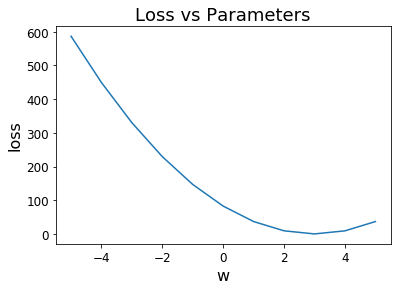

In [7]:
plt.plot(w_range.detach().numpy(), loss_list)
plt.title("Loss vs Parameters", fontsize=18)
plt.tick_params(axis='both', labelsize=12)
plt.xlabel('w', fontsize=16)
plt.ylabel('loss', fontsize=16)

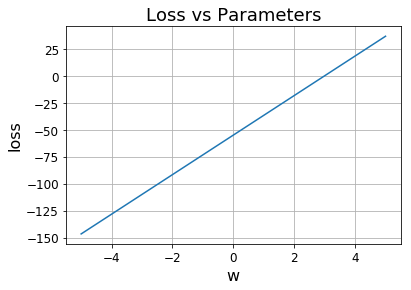

In [8]:
plt.plot(w_range.detach().numpy(), w_range.grad.numpy())
plt.title("Loss vs Parameters", fontsize=18)
plt.tick_params(axis='both', labelsize=12)
plt.xlabel('w', fontsize=16)
plt.ylabel('loss', fontsize=16)
plt.grid(True)

# Backpropagation

$ \large
\begin{align} 
\frac{\partial{J}}{\partial{w}} &= \frac{\partial{}}{\partial{w}}\sum_{i=0}^{N}(y_i-wx_i)^2 \\ 
\large &= 2\sum_{i=0}^{N}(y_i-wx_i)(-x_i)
\end{align}
$

In [9]:
def mse(y_true, y_pred):
    delta = y_true - y_pred
    return (delta**2).mean()

In [10]:
w_history = []
wgrad_history = []
lr = 1e-2

for i in range(10):
    try:
        w.grad.zero_()
    except:
        print("Starting the first point")
    w_history.append(w.data.clone())    
    
    # Calculate Loss
    y_pred = x*w
    loss = mse(y_true, y_pred)
    
    # Calculate gradients
    loss.backward()
    wgrad_history.append(w.grad.data.clone())
    
    # Update parameters
    with torch.no_grad():
        w -= w.grad * lr

Starting the first point


In [11]:
w_history

[tensor([0.7358]),
 tensor([1.1509]),
 tensor([1.4899]),
 tensor([1.7667]),
 tensor([1.9928]),
 tensor([2.1775]),
 tensor([2.3283]),
 tensor([2.4514]),
 tensor([2.5520]),
 tensor([2.6341])]

In [12]:
wgrad_history

[tensor([-41.5105]),
 tensor([-33.9002]),
 tensor([-27.6852]),
 tensor([-22.6096]),
 tensor([-18.4645]),
 tensor([-15.0793]),
 tensor([-12.3148]),
 tensor([-10.0571]),
 tensor([-8.2133]),
 tensor([-6.7075])]

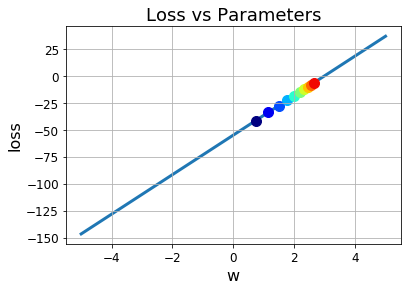

In [13]:
plt.plot(w_range.detach().numpy(), w_range.grad.numpy(), linewidth=3, zorder=-1)
plt.title("Loss vs Parameters", fontsize=18)
plt.tick_params(axis='both', labelsize=12)
plt.xlabel('w', fontsize=16)
plt.ylabel('loss', fontsize=16)
plt.grid(True)
for i in range(len(w_history)):
    plt.scatter(w_history[i].detach(),wgrad_history[i], c=[i], s=100,vmin=0, vmax=len(w_history), cmap='jet')

In [23]:
w_history

[tensor([0.7055]), tensor([1.1262])]

In [24]:
w_history

[tensor([0.7055]), tensor([1.1262])]